## Linear Regression Model on Stock Close Price and Date

goal: Create a model that predicts closing price of a stock in sp500 from the date

Data

Feature: Date.
Prediction: Close Price

In [18]:
# download data
import sys
sys.path.append('../')
from helper_functions.get_data import get_stocks_data

df = get_stocks_data()

[*********************100%%**********************]  503 of 503 completed
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_25328\3559169348.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = get_stocks_data().stack()


prepare data

In [123]:
# we have data of a few companies since 1962. fuck that lets just look at data since 2010 and also of just 1 stock for now cause idk how to work with multi index dfs
import datetime as dt
start_date = dt.datetime(2009 ,12, 31)
ticker = 'AAPL'

filtered_df = df[df.index.get_level_values(0) > start_date]
filtered_df = filtered_df[filtered_df.index.get_level_values(1) == ticker]

filtered_df = filtered_df.reset_index()
filtered_df

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,AAPL,6.461977,7.643214,7.660714,7.585000,7.622500,493729600.0
1,2010-01-05,AAPL,6.473148,7.656429,7.699643,7.616071,7.664286,601904800.0
2,2010-01-06,AAPL,6.370186,7.534643,7.686786,7.526786,7.656429,552160000.0
3,2010-01-07,AAPL,6.358409,7.520714,7.571429,7.466071,7.562500,477131200.0
4,2010-01-08,AAPL,6.400681,7.570714,7.571429,7.466429,7.510714,447610800.0
...,...,...,...,...,...,...,...,...
3644,2024-06-27,AAPL,214.100006,214.100006,215.740005,212.350006,214.690002,49772700.0
3645,2024-06-28,AAPL,210.619995,210.619995,216.070007,210.300003,215.770004,82542700.0
3646,2024-07-01,AAPL,216.750000,216.750000,217.509995,211.919998,212.089996,60402900.0
3647,2024-07-02,AAPL,220.270004,220.270004,220.380005,215.100006,216.149994,58046200.0


In [216]:
# import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [223]:
# create x and y matricies (features and predicition)
x = np.array([date for date in filtered_df.index]).reshape(-1, 1)
y = filtered_df.Close

# split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(x_train, y_train)

# Make predictions for training & testing sets
y_train_pred = poly_model.predict(x_train)
y_test_pred = poly_model.predict(x_test)

# Check if model is good
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_r2, test_r2

(0.8014681840590512, 0.8087856962864715)

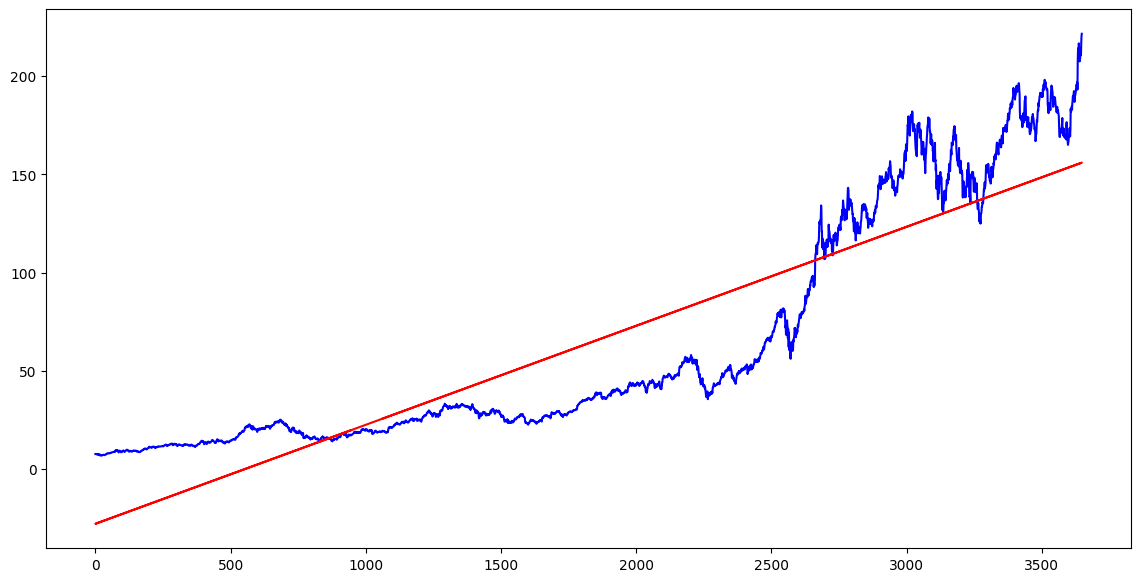

In [204]:
# plot model predicitions with actual data
x_combined = np.concatenate((x_test, x_train))
y_combined = np.concatenate((y_test_pred, y_train_pred))

plt.figure(figsize=(14, 7))
plt.plot(filtered_df.index, filtered_df.Close, label='Historical Daily Average Close', color='blue')
plt.plot(x_combined, y_combined, color='Red')

In [222]:
# make future predictions
start_index = filtered_df.index.max()
num_days = 365*10 + 1

# create x matrix
x_future = np.arange(start_index, start_index + num_days).reshape(-1, 1)

# predict future prices
y_future = poly_model.predict(x_future)

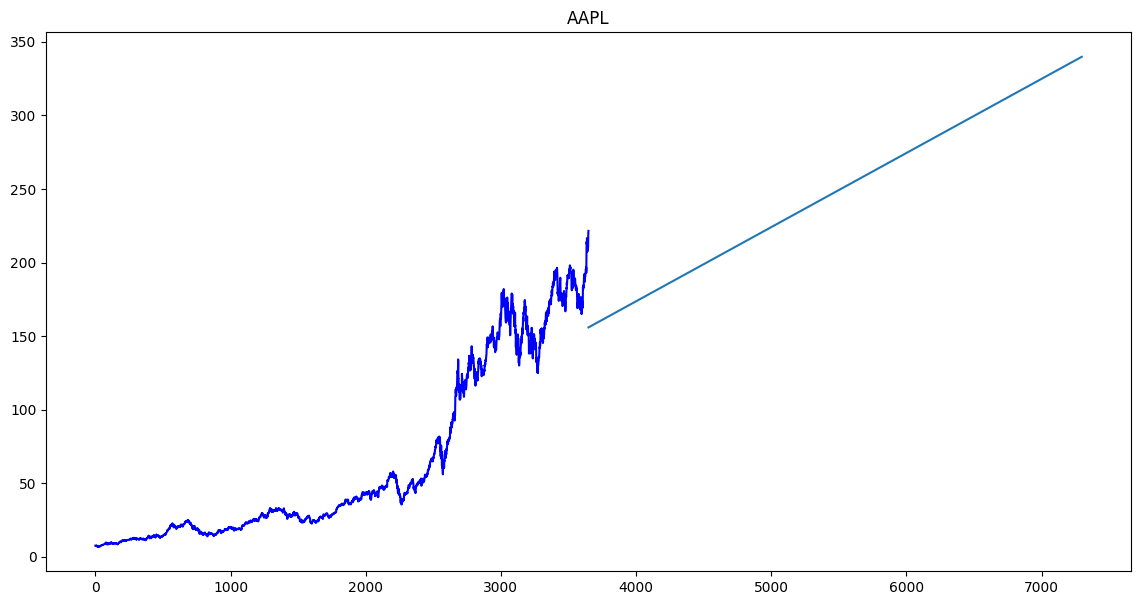

In [211]:
# plot future predicted prices
plt.figure(figsize=(14, 7))
plt.title(ticker)
plt.plot(filtered_df.index, filtered_df.Close, color='blue')
plt.plot(x_future, y_future)